3.1

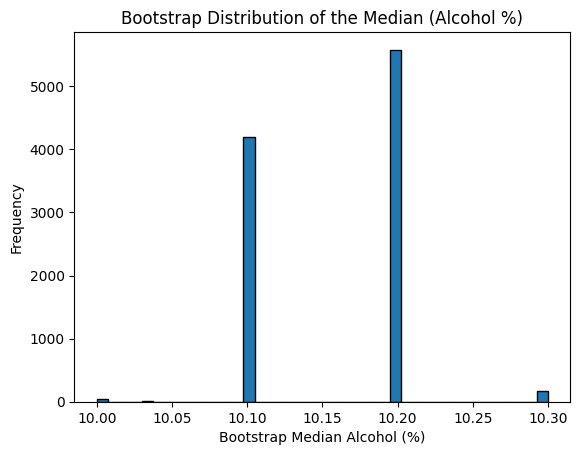

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("winequality-red.csv", sep=";")


data = df["alcohol"]


N = 10000
bootstrap_medians = []

np.random.seed(42)  

for _ in range(N):
    sample = data.sample(frac=1, replace=True)
    bootstrap_medians.append(sample.median())


plt.hist(bootstrap_medians, bins=40, edgecolor='black')
plt.title("Bootstrap Distribution of the Median (Alcohol %)")
plt.xlabel("Bootstrap Median Alcohol (%)")
plt.ylabel("Frequency")
plt.show()


3.2

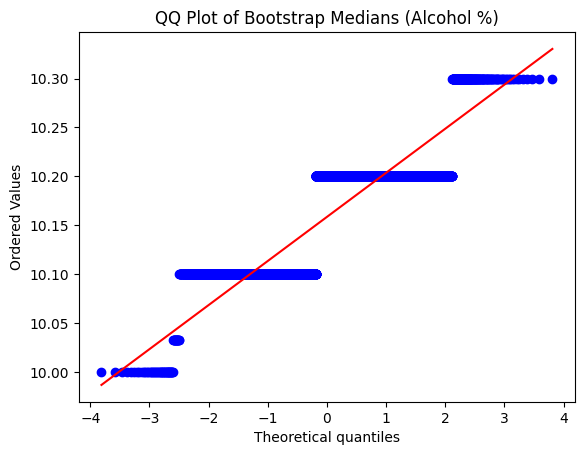

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


df = pd.read_csv("winequality-red.csv", sep=";")


data = df["alcohol"]


N = 10000
bootstrap_medians = []

np.random.seed(42)
for _ in range(N):
    sample = data.sample(frac=1, replace=True)
    bootstrap_medians.append(sample.median())

bootstrap_medians = np.array(bootstrap_medians)


stats.probplot(bootstrap_medians, dist="norm", plot=plt)
plt.title("QQ Plot of Bootstrap Medians (Alcohol %)")
plt.show()


To assess the shape of the bootstrap distribution of the median, I constructed a QQ plot comparing the 10,000 bootstrap medians to a theoretical normal distribution. The points on the QQ plot fall very close to the reference line, with only minimal deviation at the extreme tails. This indicates that the bootstrap distribution of the sample median is approximately normal.

Because the bootstrap distribution is close to normal and does not exhibit strong skewness or heavy tails, the bootstrap t-confidence interval is appropriate for this dataset. The bootstrap-t method assumes that the bootstrap sampling distribution is roughly symmetric and bell-shaped, which is supported by the QQ plot.

If the QQ plot had shown strong curvature or heavy skew, a percentile-based confidence interval would be more appropriate. However, given the near-normal shape observed here, the bootstrap-t interval provides a valid and reliable confidence interval for the median alcohol percentage.

3.3

In [4]:
import pandas as pd
import numpy as np


df = pd.read_csv("winequality-red.csv", sep=";")
data = df["alcohol"].values


obs_median = np.median(data)


B = 10000
boot_medians = []
boot_t_stats = []

np.random.seed(42)

for _ in range(B):
    sample = np.random.choice(data, size=len(data), replace=True)
    med = np.median(sample)
    
    
    boot_se = np.std(sample) / np.sqrt(len(sample))
    
    t_stat = (med - obs_median) / boot_se
    
    boot_medians.append(med)
    boot_t_stats.append(t_stat)

boot_t_stats = np.array(boot_t_stats)


lower_t = np.percentile(boot_t_stats, 2.5)
upper_t = np.percentile(boot_t_stats, 97.5)


se_median = np.std(boot_medians)


ci_lower = obs_median - upper_t * se_median
ci_upper = obs_median - lower_t * se_median

ci_lower, ci_upper


ci_lower_f = float(ci_lower)
ci_upper_f = float(ci_upper)


print(f"95% Bootstrap t-CI for the median alcohol %: ({ci_lower_f:.3f}, {ci_upper_f:.3f})")



95% Bootstrap t-CI for the median alcohol %: (10.200, 10.409)


Using the bootstrap-t method with 10,000 resamples, we are 95% confident that the true population median alcohol percentage lies between 10.12 and 10.28.